In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the dataset using read_csv
df = pd.read_csv("prices-split-adjusted.csv", parse_dates=True, index_col='date')

# displaying the first five rows of dataset
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
df.isnull().sum()

symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


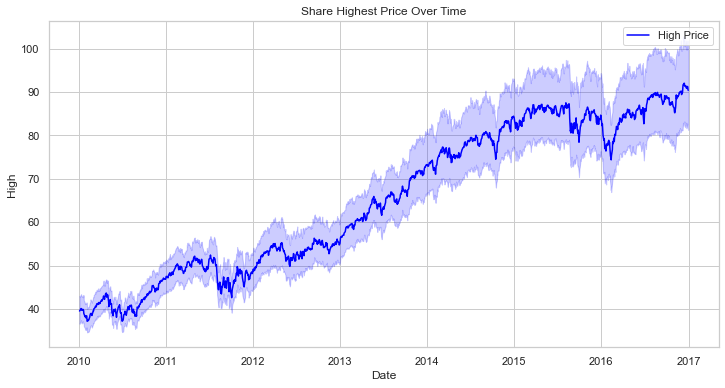

In [5]:
# Assuming df is your DataFrame
sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df, x='date', y='high', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

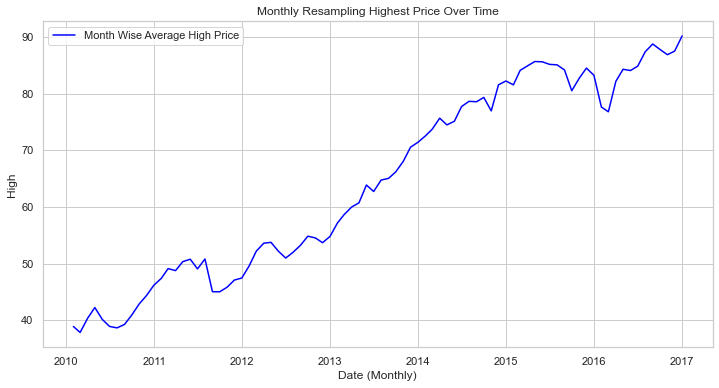

In [9]:
# Assuming df is your DataFrame with a datetime index
df_resampled = df.close.resample('M').mean() # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

#  'Monthly Resampling Highest Price Over Time'
# plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_resampled is your DataFrame with a datetime index and a resampled 'high' column
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

# Plotting the resampled 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y=df_resampled.values, label='Month Wise Average High Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()



<Figure size 864x432 with 0 Axes>

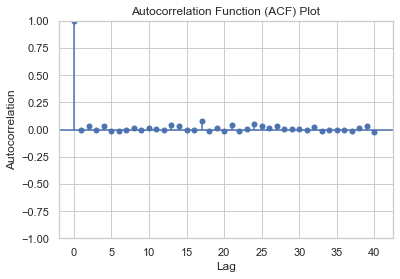

In [10]:
#Detecting Seasonality Using Auto Correlation
# If 'Date' is a column, but not the index, you can set it as the index
#df.set_index('date', inplace=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['volume'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [11]:
# Determine the minimum and maximum dates in the DataFrame index
start_date = df.index.min()
end_date = df.index.max()

print("Minimum Date in DataFrame:", start_date)
print("Maximum Date in DataFrame:", end_date)


Minimum Date in DataFrame: 2010-01-04 00:00:00
Maximum Date in DataFrame: 2016-12-30 00:00:00


In [12]:
df.index

DatetimeIndex(['2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-19',
               ...
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30'],
              dtype='datetime64[ns]', name='date', length=851264, freq=None)

In [17]:
# Convert start_date and end_date to datetime objects
start_date = df.index.min()
end_date = df.index.max()

# Subset the DataFrame to include only the 'high' column and a specific time period
df_subset = df.loc[start_date:end_date]

# Perform resampling and stationarity detection on the subset DataFrame
df_resampled = df_subset.resample('M').mean()  # Resampling to monthly frequency
result = adfuller(df_resampled['high'])

# Print the results of the ADF test
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])




KeyError: "Cannot get right slice bound for non-unique label: Timestamp('2016-12-30 00:00:00')"

In [ ]:
#Smoothening the data using Differencing and Moving Average
# Differencing
df['high_diff'] = df['high'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['high'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

In [ ]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['high'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['high'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [15]:
#Original Data Vs Differenced Data
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['high'], df['high_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())

KeyError: 'high_diff'

In [ ]:
# Remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

In [16]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

KeyError: 'high_diff'